## This notebook is meant to be run from COLAB

In [0]:
# Downgrade to TF 1.13.1
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 106kB/s 
     |████████████████████████████████| 3.2MB 33.7MB/s 
     |████████████████████████████████| 368kB 23.0MB/s 
ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import pickle
import random
from sklearn.model_selection import train_test_split


##Mounting GDrive

In [6]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')
# drive.mount('/content/drive/My\ Drive/Colab\ Notebooks/IDRID')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# cd 'My Drive'
cd 'drive/My Drive/Colab_Notebooks/IDRID/'

/content/drive/My Drive/Colab_Notebooks/IDRID


In [0]:
# ls

## Load image data from pickle file and store it in 'training_data' array

In [0]:
pickle_in = open("training_data_brightness.pickle","rb")
training_data = pickle.load(pickle_in)

## Create X_train, X_test, y_train, y_test
## This cell must be run each time the model will be trained

In [0]:
random.shuffle(training_data)

IMG_SIZE = 224

X = []
y = []

# This for loop reads data and creates X and y
for features,label in training_data:
    X.append(features)
    y.append(label)

    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y).reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


## Specify h5 file name for traine model 

In [0]:
saved_h5 = 'cnn_trained_mcp.h5'

## Train the MODEL

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


X_train = X_train/255.0
y_train = to_categorical(y_train)
X_test = X_test/255.0
y_test = to_categorical(y_test)


# Here is the model
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20)) 

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.20)) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20)) 

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())

# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

model.add(Dense(5))
# model.add(Activation('sigmoid'))
# softmax is commonly used for classification of multiple categories
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])              


earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min')

# Input the name of the h5 file to be saved
# mcp_save = ModelCheckpoint('cnn_trained_mcp.h5', save_best_only=True, monitor='val_loss', mode='min')
mcp_save = ModelCheckpoint(saved_h5, save_best_only=True, monitor='val_loss', mode='min')
# saved_h5

history = model.fit(X_train, y_train, batch_size=32, epochs=70, validation_data=(X_test, y_test), callbacks=[earlyStopping, mcp_save], class_weight={0:0.4057, 1:1.9794, 2:0.7331, 3:3.7948, 4:2.4827})


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 3112 samples, validate on 550 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
3112/3112 [==============================] - 10s 3ms/sample - loss: 1.6120 - acc: 0.3512 - val_loss: 1.5749 - val_acc: 0.4782
Epoch 2/10
3112/3112 [==============================] - 7s 2ms/sample - loss: 1.4816 - acc: 0.4508 - val_loss: 1.1057 - val_acc: 0.4545
Epoch 3/10
3112/3112 [==============================] - 7s 2ms/sample - loss: 1.3930 - acc: 0.5013 - val_loss: 1.1758 - val_acc: 0.5055
Epoch 4/10
3112/3112 [==============================] - 8s 3ms/sample - loss: 1.3680 - acc: 0.5447 - val_loss: 1.0309 - val_acc: 0.5236
Epoch 5/10
3112/3112 [==============================] - 7s 2ms/sample - loss: 1.3199 - acc: 0.5482 - val_loss: 1.1616 - val_acc: 0.5200
Epoch 6/10
3112/3112 [===============

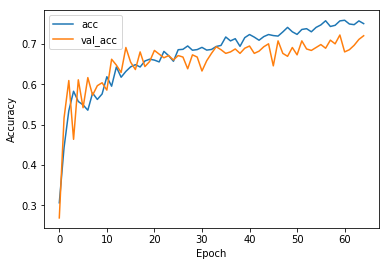

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
 
plt.plot(acc)
plt.plot(val_acc)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

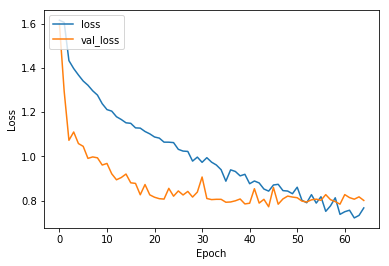

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
 
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [0]:
model.evaluate(X_test, y_test)

550/550 [==============================] - 1s 1ms/sample - loss: 0.8011 - acc: 0.7200


[0.801065731048584, 0.72]

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
__________

In [0]:
# Boilerplate code from sklearn website
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:
# ls -l

## Load Saved Model

In [12]:
from keras.models import load_model
trained_model = tf.keras.models.load_model(saved_h5)
trained_model.evaluate(X_test, y_test)

550/550 [==============================] - 1s 1ms/sample - loss: 0.9209 - acc: 0.6400


[0.9208846369656649, 0.64]

## Print out model metrics

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import itertools

prediction_vector = np.argmax(trained_model.predict(X_test), axis=1)
label_vector = np.argmax(y_test, axis=1)

cm = confusion_matrix(label_vector,prediction_vector)
f1 = f1_score(label_vector,prediction_vector, average='weighted')
kappa = cohen_kappa_score(label_vector,prediction_vector,weights='quadratic')

cm_labels = ['No_DR','Mild','Moderate','Severe','Proliferate_DR']

print(cm)
print('\nf1: '+str(f1))
print('\nkappa: '+str(kappa))

[[266   7   4   0   0]
 [  3  31  14   2   7]
 [  8  29  62  18  19]
 [  0   1   7  11   9]
 [  4   8  17   8  15]]

f1: 0.7007626049091965

kappa: 0.7473149328664026


Confusion matrix, without normalization
[[266   7   4   0   0]
 [  3  31  14   2   7]
 [  8  29  62  18  19]
 [  0   1   7  11   9]
 [  4   8  17   8  15]]


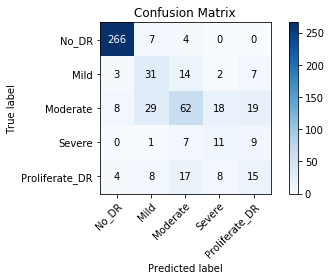

In [0]:
plot_confusion_matrix(label_vector, prediction_vector, cm_labels, title='Confusion Matrix')

Normalized confusion matrix
[[0.96028881 0.02527076 0.01444043 0.         0.        ]
 [0.05263158 0.54385965 0.24561404 0.03508772 0.12280702]
 [0.05882353 0.21323529 0.45588235 0.13235294 0.13970588]
 [0.         0.03571429 0.25       0.39285714 0.32142857]
 [0.07692308 0.15384615 0.32692308 0.15384615 0.28846154]]


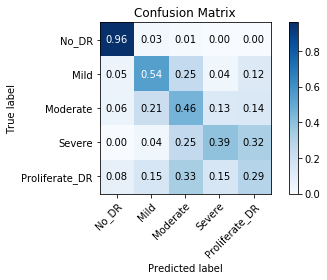

In [0]:
plot_confusion_matrix(label_vector, prediction_vector, cm_labels, normalize=True, title='Confusion Matrix')

In [0]:
# fpr,tpr,_ = roc_curve(label_vector, prediction_vector, pos_label=None, drop_intermediate=True)